##### 题目三：采用 scikit-learn 中的 LogisticRegression 逻辑回归模型对非线性数据集进行分类

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

1. 数据集：使用 sklearn 自带数据生成器 make_moons 产生两类数据样本

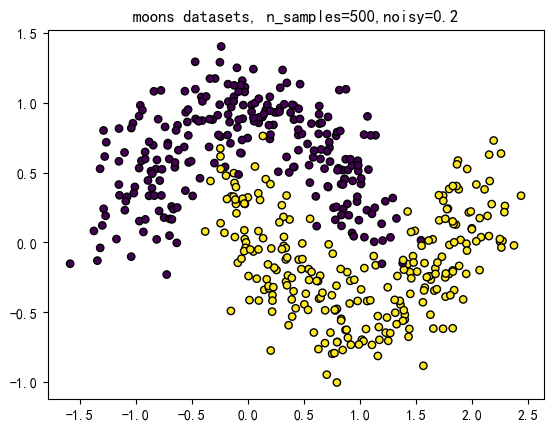

In [18]:

plt.rcParams['font.family'] = 'SimHei'      # 中文正常显示
plt.rcParams['axes.unicode_minus'] = False  # 符号正常显示
plt.title("moons datasets, n_samples=500,noisy=0.2")
X, y = datasets.make_moons(n_samples=500, noise=0.2,random_state=520)
plt.scatter(X[:,0],X[:,1],c=y,marker='o',s=28,edgecolors='k')
plt.show()
# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=555, stratify=y)# 这里也需要设置分层抽样



2. 特征衍生（数据增强）：使用 sklearn 自带 sklearn.preprocessing.PolynomialFeatures 生成指
定阶次的多项式特征，从而得到所有多项式组合成的新特征矩阵，degree 参数任选。
3. 模型建立：在新特征基础上建立逻辑回归二分类模型

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures

#  特征衍生（数据增强）：使用 sklearn 自带 sklearn.preprocessing.PolynomialFeatures 生成指定阶次的多项式特征，从而得到所有多项式组合成的新特征矩阵
# 使用了 Pipeline，可以将多个算法串联起来,# 创建一个包含特征衍生和逻辑回归的 pipeline
pipeline = Pipeline([
    ("poly_features", PolynomialFeatures(degree=3)),    # 特征衍生
    ("log_reg", LogisticRegression()),
])
pipeline.fit(X_train, y_train)
print('Test score: ', pipeline.score(X_test, y_test))   # 这里的 score 是 accuracy，即正确率


Test score:  0.93


4. 决策边界可视化：绘制决策边界，观察非线性边界的变化

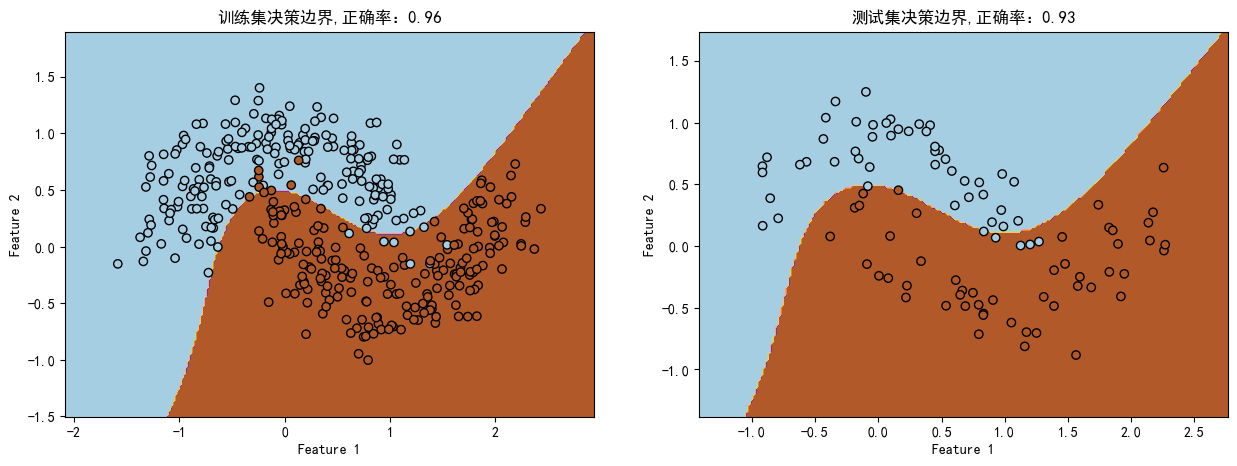

In [20]:
def plot_decision_boundary(X, y, model, ax, title=''):
    # 生成网格采样点
    h = 0.02  # 网格步长
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # 对网格中的点进行预测
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # 绘制等高线图
    ax.contourf(xx, yy, Z, cmap=plt.cm.Paired)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_title(title)

# 绘制训练集决策边界
fig, ax = plt.subplots(1,2)
fig.set_size_inches(15, 5)
plot_decision_boundary(X_train, y_train, pipeline, ax[0], title='训练集决策边界,正确率：%.2f' % pipeline.score(X_train, y_train)) 

# 绘制测试集决策边界
plot_decision_boundary(X_test, y_test, pipeline, ax[1], title='测试集决策边界,正确率：%.2f' % pipeline.score(X_test, y_test))
plt.show()

- 讨论二：在不加正则项的情况下，改变特征衍生的特征数量（即 degree 参数），观察决策边
界的变化情况，以及训练集和测试集分数，体会模型从欠拟合 ->拟合 ->过拟合的过程。
提示：可使用 for 循环对不同 degree 进行遍历，观察模型的建模结果。可通过绘制训练集和测试集分数曲线帮助观察

/home/tdt-link/anaconda3/envs/course/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/tdt-link/anaconda3/envs/course/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/lin

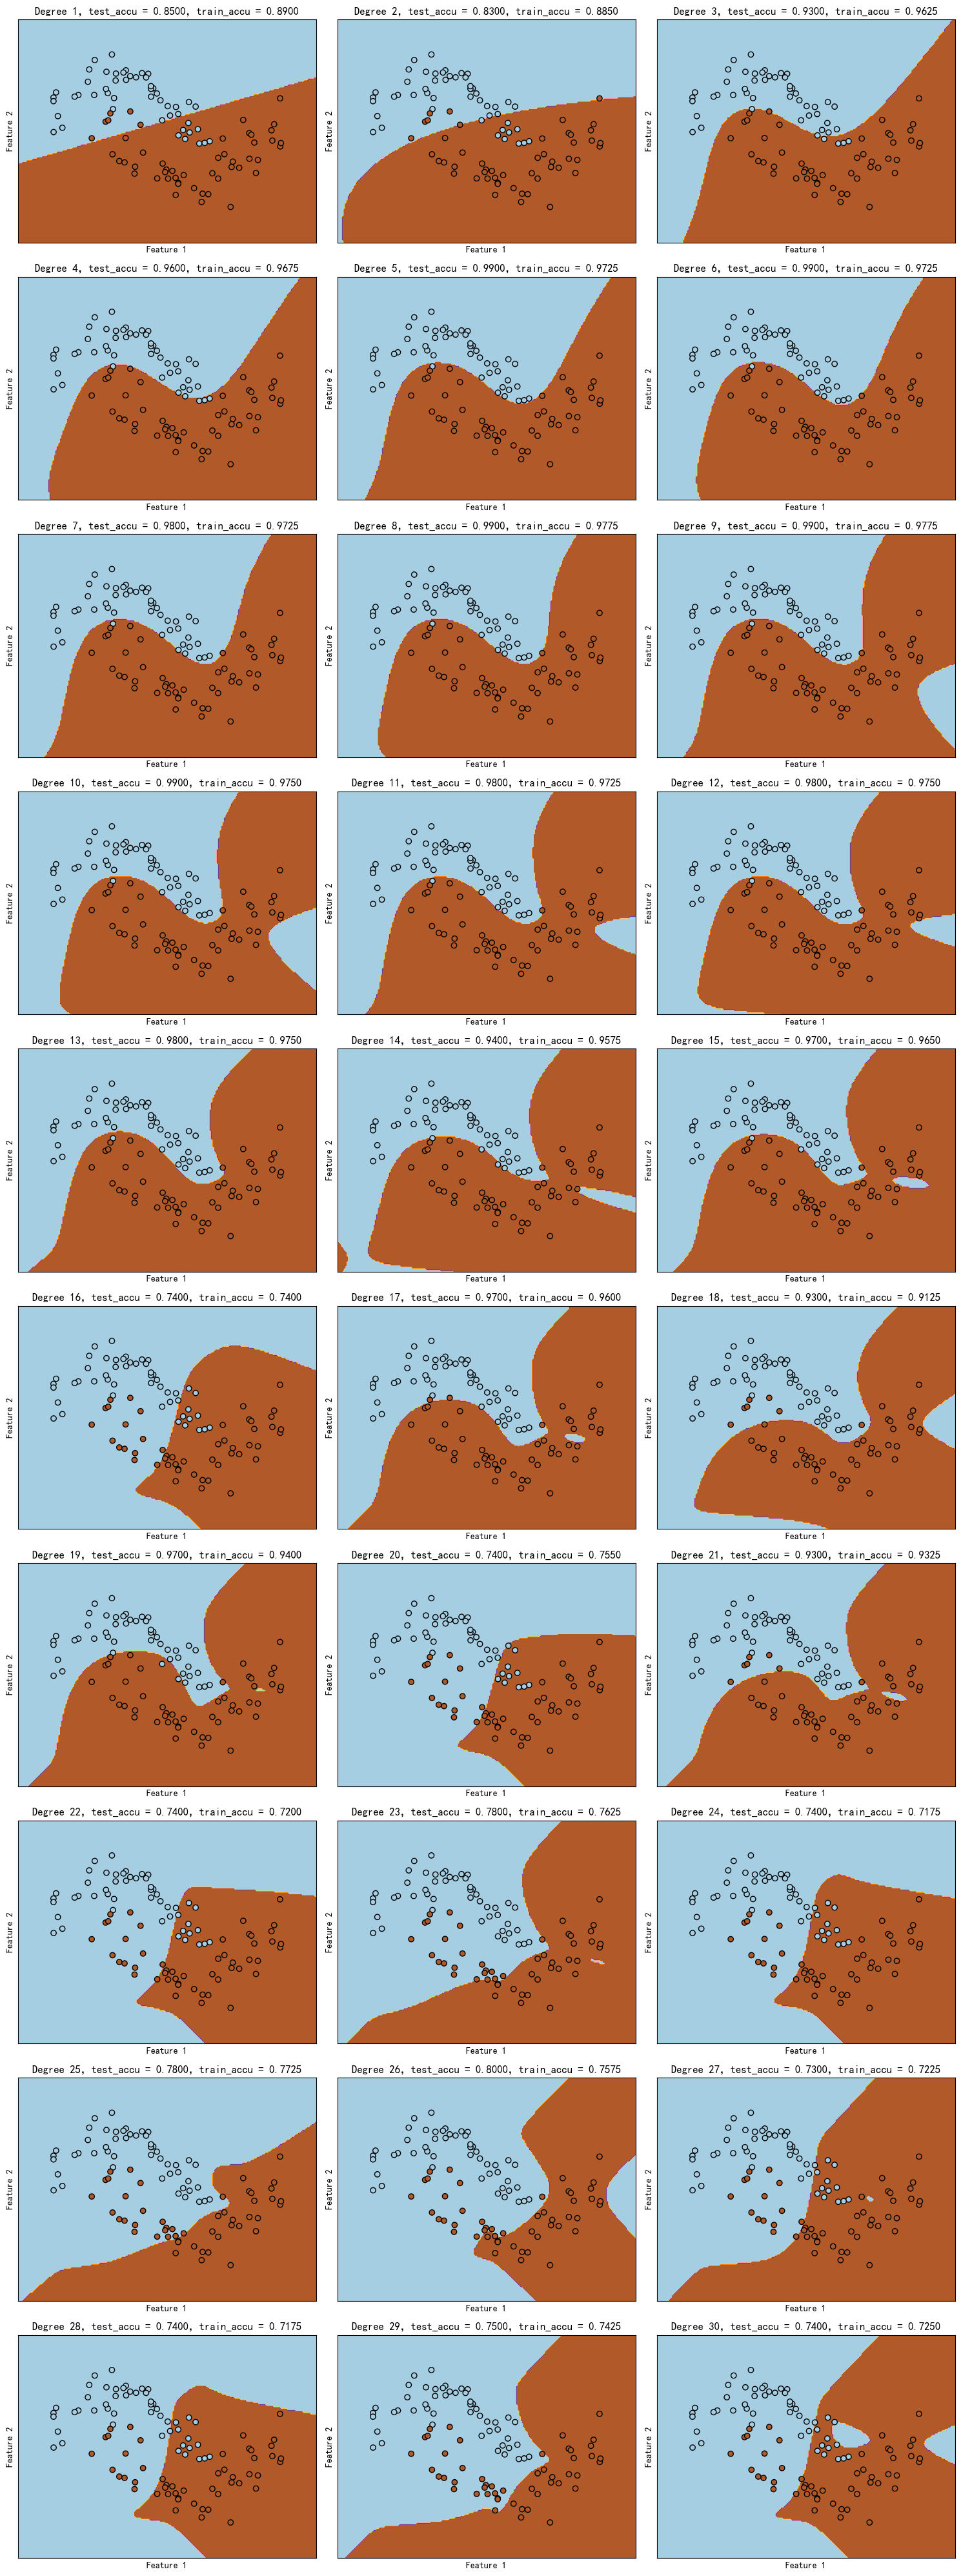

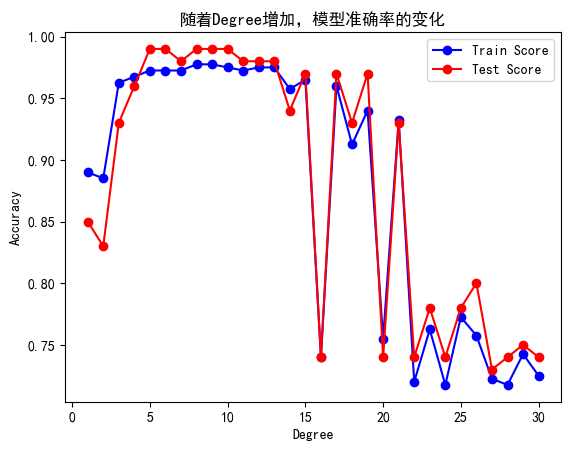

In [21]:
degrees = range(1, 31)  # 不同的 degree 值
train_scores = []
test_scores = []

num_cols = 3  # 每行的子图数目
num_rows = int(np.ceil(len(degrees) / num_cols))  # 总行数

fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 4 * num_rows))
axs = axs.flatten()

for i, degree in enumerate(degrees):
    # 特征衍生
    poly = PolynomialFeatures(degree=degree)

    # 建立逻辑回归模型
    log_reg = LogisticRegression()

    # 创建一个包含特征衍生和逻辑回归的 pipeline
    pipeline = Pipeline([
        ("poly_features", poly),
        ("log_reg", log_reg),
    ])

    # 训练模型
    pipeline.fit(X_train, y_train)

    # 计算训练集和测试集的分数
    train_score = pipeline.score(X_train, y_train)
    test_score = pipeline.score(X_test, y_test)

    # 保存训练集和测试集的分数
    train_scores.append(train_score)
    test_scores.append(test_score)

    # 绘制决策边界
    plot_decision_boundary(X_test, y_test, pipeline, axs[i], title='Degree {}'.format(degree))

    axs[i].set_title('Degree {}，test_accu = {:.4f}，train_accu = {:.4f}'.format(degree, test_score, train_score))
    axs[i].set_xticks([])
    axs[i].set_yticks([])

# 移除多余的子图
for j in range(len(degrees), num_rows * num_cols):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

# 绘制训练集和测试集分数曲线
plt.plot(degrees, train_scores, 'bo-', label='Train Score')
plt.plot(degrees, test_scores, 'ro-', label='Test Score')
plt.xlabel('Degree')
plt.ylabel('Accuracy')
plt.legend()
plt.title('随着Degree增加，模型准确率的变化')
plt.show()

决策边界的变化：随着 degree 值的增加，决策边界变得更加复杂。较小的 degree 值（如1、2、3）对数据集的拟合能力较差，决策边界过于简单，可能导致欠拟合。随着 degree 值的增加，决策边界更加弯曲，可以更好地适应数据集，但在一定程度上也会导致过拟合。

模型性能：从训练集和测试集的分数曲线可以看出，随着 degree 值的增加，训练集的分数逐渐增加，而测试集的分数则先增加后减小。在低 degree 值时，模型的复杂度较低，导致欠拟合，训练集和测试集的分数都较低。随着 degree 值的增加，模型的复杂度增加，使得模型能够更好地拟合训练集，因此训练集的分数逐渐增加。然而，当 degree 值过高时，模型过于复杂，出现过拟合现象，导致测试集的分数开始下降。

- 讨论三：在讨论二的基础上选择一种模型过拟合的 degree，在模型中分别加入’l1’和’l2’正则
项，观察决策边界的变化情况，以及训练集和测试集分数，体会两种正则项对模型的作用

/home/tdt-link/anaconda3/envs/course/lib/python3.8/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/tdt-link/anaconda3/envs/course/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


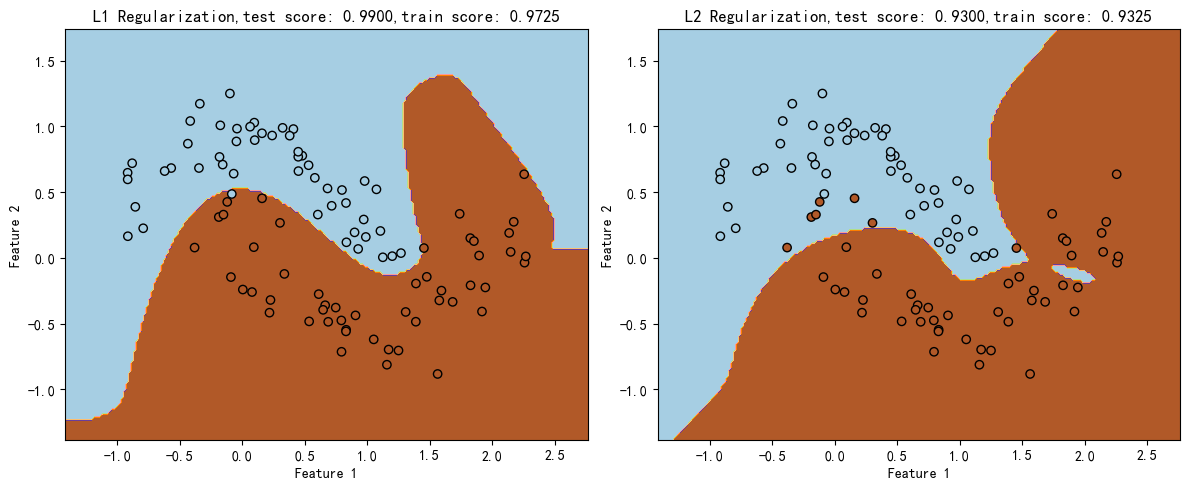

In [22]:
degree = 21  # 过拟合的 degree 值

# （2）特征衍生
poly = PolynomialFeatures(degree=degree)

# 建立逻辑回归模型
log_reg_l1 = LogisticRegression(penalty='l1', solver='liblinear')
log_reg_l2 = LogisticRegression(penalty='l2')

# 创建包含特征衍生和逻辑回归的 pipeline
pipeline_l1 = Pipeline([
    ("poly_features", poly),
    ("log_reg_l1", log_reg_l1),
])

pipeline_l2 = Pipeline([
    ("poly_features", poly),
    ("log_reg_l2", log_reg_l2),
])

# 训练模型
pipeline_l1.fit(X_train, y_train)
pipeline_l2.fit(X_train, y_train)

# 在测试集上进行评估
score_l1 = pipeline_l1.score(X_test, y_test)
score_l2 = pipeline_l2.score(X_test, y_test)
# print('Test score (L1 regularization):', score_l1)
# print('Test score (L2 regularization):', score_l2)

# 绘制决策边界
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
plot_decision_boundary(X_test, y_test, pipeline_l1, axs[0], title='L1 Regularization,test score: %.4f,train score: %.4f' % (score_l1, pipeline_l1.score(X_train, y_train)))
plot_decision_boundary(X_test, y_test, pipeline_l2, axs[1], title='L2 Regularization,test score: %.4f,train score: %.4f' % (score_l2, pipeline_l2.score(X_train, y_train)))

plt.tight_layout()
plt.show()
# 通过观察决策边界的变化和模型的性能表现，我们可以发现：
# L1 正则化可以使得模型的决策边界更加稀疏，即更多的特征系数为 0，从而达到特征选择的目的
# L2 正则化可以使得模型的决策边界更加平滑，即特征系数更加均匀，从而达到防止过拟合的目的
# 对比加入 L1 正则化和 L2 正则化前后的模型性能，我们可以发现：
# L1 正则化可以使得模型的准确率上升，但是训练集和测试集的准确率差距变大，即模型略微过拟合
# L2 正则化没有改变模型的准确率

- 讨论四：可尝试手动调整 degree、正则项系数 C 和正则项种类，寻找使模型泛化性能最好的
一组参数。
提示：手动调参采用“单一变量”原则。可先设定正则项种类（如‘l1’）和正则项系数 C（如默认），
再人为设定特征最高阶次 degree 的范围进行 degree 寻优，在选定的 degree 和‘l1’正则化后，设定正
则项系数 C 的范围进行寻优

/home/tdt-link/anaconda3/envs/course/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/tdt-link/anaconda3/envs/course/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.htm

Best Parameters:  {'log_reg__C': 100, 'log_reg__penalty': 'l2', 'poly_features__degree': 3}
Best Score:  0.975
Test Score:  0.99


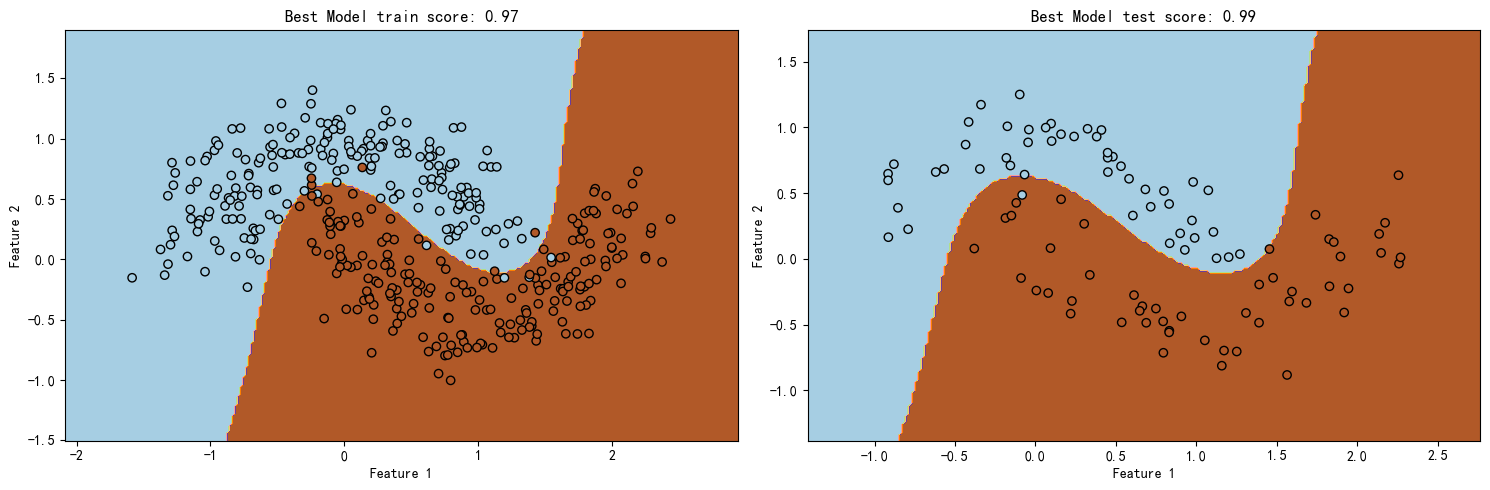

In [23]:
from sklearn.model_selection import GridSearchCV

# 设置待调优的参数范围
param_grid = {
    'poly_features__degree': range(1, 21),  # 不同的 degree 值
    'log_reg__penalty': ['l1', 'l2'],  # 正则项种类
    'log_reg__C': [0.01, 0.1, 1, 10, 100],  # 正则项系数 C
}

# 创建一个包含特征衍生和逻辑回归的 pipeline
pipeline = Pipeline([
    ("poly_features", PolynomialFeatures()),
    ("log_reg", LogisticRegression()),
])

# 使用网格搜索进行参数调优
grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# 获取最佳参数组合和最佳模型
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Parameters: ", best_params)
print("Best Score: ", grid_search.best_score_)

# 在测试集上进行评估
test_score = best_model.score(X_test, y_test)
print("Test Score: ", test_score)

# 绘制最好模型训练集决策边界
fig, ax = plt.subplots(1,2,figsize=(15, 5))
plot_decision_boundary(X_train, y_train, best_model, ax[0], title='Best Model train score: %.2f' % best_model.score(X_train, y_train))
# 绘制最好模型测试集决策边界
plot_decision_boundary(X_test, y_test, best_model, ax[1], title='Best Model test score: %.2f' % test_score)



plt.tight_layout()
plt.show()